# Import

In [3]:
from gensim import utils
import gensim.models
from chemdataextractor import Document
import re
import pandas as pd
from pprint import pprint
from random import choice
from adjustText import adjust_text

# Pre-training

## No Punctuation

In [ ]:
# NOTE: 初始化 db_tokens
import pymongo
client = pymongo.MongoClient('mongodb://localhost:27017')
db_tokens = client['year_tokens']

In [ ]:
# NOTE: 从数据库中取 year_tokens
year_tokens = {}
for year in db_tokens.list_collection_names():
    for paper in db_tokens[year].find({}, {'_id': 0}):
        if year not in year_tokens: year_tokens[year] = [(paper['doi'], paper['title'], paper['tokens'])]
        else: year_tokens[year].append((paper['doi'], paper['title'], paper['tokens']))

# print(year_tokens['2020'])

In [ ]:
year_tokens['2020']

In [ ]:
all_tokens = []
for year in year_tokens:
    for tup in year_tokens[year]:
        doi, title, token_lst = tup
        # print(set(token_lst))
        # break
        all_tokens += token_lst
        # print(all_tokens)
        # break
    # break
# print(1)
# print(all_tokens[:100])
# all_token = set(tuple(all_tokens))
print(len(all_tokens))
all_tokens_set = set(all_tokens)

In [ ]:
count = 0
chems = set()
for token in all_tokens_set:
    try:
        if len(Document(token).cems) != 0:
            count += 1
            chems.add(token)
    except KeyboardInterrupt: print(count)
print(count)
print(len(chems))

In [ ]:
count = 0

for t in all_tokens:
    try:
        if t in chems: count += 1
    except: KeyboardInterrupt: print(count)
print(count)

In [ ]:
print(len(all_tokens))

In [ ]:
print(year_tokens['2020'][0])

In [ ]:
# NOTE: 建立语料库
from gensim import utils

class Corpus:
    def __iter__(self):
        for year in year_tokens:
            token_lst = year_tokens[year]
            for tup in token_lst:
                tokens = tup[-1]
                yield tokens

corpus = Corpus()

## With Punctuation

In [ ]:
# NOTE: 初始化 db_tokens_punct
import pymongo
client = pymongo.MongoClient('mongodb://localhost:27017')
db_tokens_punct = client['year_tokens_punct_test']

In [ ]:
year_tokens_punct = {}
for year in db_tokens_punct.list_collection_names():
    for paper in db_tokens_punct[year].find({}, {'_id': 0}):
        if year not in year_tokens_punct: year_tokens_punct[year] = [(paper['doi'], paper['title'], paper['tokens'])]
        else: year_tokens_punct[year].append((paper['doi'], paper['title'], paper['tokens']))


### All Years

In [ ]:
# NOTE: set
all_tokens_punct = []
for year in year_tokens_punct:
    for tup in year_tokens_punct[year]:
        doi, title, token_lst = tup
        # print(set(token_lst))
        # break
        all_tokens_punct += token_lst
        # print(all_tokens)
        # break
    # break
# print(1)
# print(all_tokens[:100])
all_tokens_punct = set(tuple(all_tokens_punct))
print(len(all_tokens_punct))

In [ ]:
import spacy

nlp = spacy.load('en_core_web_sm')
doc = nlp('I were 10 years old.')
type(doc[1].lemma_)

In [ ]:
# NOTE: not set
import spacy

nlp = spacy.load('en_core_web_sm')

all_tokens_punct = []
for year in year_tokens_punct:
    for tup in year_tokens_punct[year]:
        doi, title, token_lst = tup
        # print(set(token_lst))
        # break
        all_tokens_punct += token_lst
        # print(all_tokens)
        # break
    # break
# print(1)
# print(all_tokens[:100])
print(len(all_tokens_punct))


In [ ]:
for i in range(520):
    all_words = ' '.join(all_tokens_punct[int(f'{i}00000'):int(f'{i+1}00000')])
    doc = nlp(all_words)
    print(i, end = ' ')
print(1)

In [ ]:
# NOTE: 建立语料库
from gensim import utils

class Corpus:
    def __iter__(self):
        for year in year_tokens_punct:
            token_lst = year_tokens_punct[year]
            for tup in token_lst:
                tokens = tup[-1]
                yield tokens

corpus = Corpus()

In [ ]:
print(year_tokens_punct['2000'][0][-1])

In [ ]:
counts = {'o-SWCNH': 0, 'H2NiO2': 0, 'MnO2':0, 'PPy':0, 'GOx':0, 'ITO':0, 'RVC':0, 'PEDOT':0, 'La4Mn5O15Sr':0, 'ScSZ':0}
for w in all_tokens_punct:
    if w in counts: counts[w] += 1
print(counts)
print(len(all_tokens_punct))

### One Year

In [ ]:
year = 2000

In [ ]:
# NOTE: visited
visited = []
for y in range(1998, year):
    for tup in year_tokens_punct[str(y)]:
        doi, title, token_lst = tup
        visited += token_lst
print(len(visited))
# print(visited[:100])

In [ ]:
def add_visit(visited, year):
    for tup in year_tokens_punct[str(year)]:
        doi, title, token_lst = tup
        visited += token_lst


In [ ]:
# NOTE: 建立语料库
from gensim import utils

class Corpus:
    def __init__(self, )
    def __iter__(self):
        token_lst = visited[:]
        yield token_lst

print(len(visited))
corpus = Corpus()

# Table

In [ ]:
all_tokens_punct = []
for year in year_tokens_punct:
    for tup in year_tokens_punct[year]:
        doi, title, token_lst = tup
        all_tokens_punct += token_lst

## Electrolyte

In [ ]:
# NOTE: all year
materials = {'CGO':0, 'TEGDME':0, 'ClLi':0, 'Ce0.8Sm0.2O2-d':0, 'La0.9Sr0.1Ga0.8Mg0.2O3-d':0, 'LSCF':0, 'ClK':0, 'GDC':0, 'La0.8Sr0.2Ga0.8Mg0.2O3-d':0, 'LiNO3':0}

maximum = 0

for t in all_tokens_punct:
    if t in materials: 
        materials[t] += 1
        if materials[t] > maximum: maximum = materials[t]

for t in materials:
    materials[t] /= maximum

data = []
for t in materials:
    data.append(materials[t])
data.sort()
print([x/max(data) for x in data])  
print(maximum) 
pprint(materials)
    

In [ ]:
# NOTE: use each year as maximum
import pandas as pd
from pprint import pprint

materials = {'CGO':[0], 'TEGDME':[0], 'ClLi':[0], 'Ce0.8Sm0.2O2-d':[0], 'La0.9Sr0.1Ga0.8Mg0.2O3-d':[0], 'LSCF':[0], 'ClK':[0], 'LiTFSI':[0], 'La0.8Sr0.2Ga0.8Mg0.2O3-d':[0], 'LiNO3':[0]}


all_tokens_punct = []
for year in range(2001, 2022):
    maximum = 0
    for i in materials: materials[i].append(0)
    year = str(year)
    for tup in year_tokens_punct[year]:
        doi, title, token_lst = tup
        all_tokens_punct += token_lst
    for i in all_tokens_punct:
        if i in materials: 
            # print(materials[i])
            materials[i][-1] += 1
            materials[i][0] += 1
            if materials[i][-1] > maximum: maximum = materials[i][-1]
    
    for t in materials: materials[t][-1] /= maximum
    
tot_max = 0
for i in materials:
    if materials[i][0] > maximum: maximum = materials[i][0]

for i in materials:
    materials[i][0] /= maximum

print(materials)

table = [x for x in materials.values()]
i = 0
table = [x for x in materials.values()]
# for m in materials: 
#     table[i].insert(0, m)
#     i += 1
# print(table)


In [ ]:
# NOTE: Use most frequency as maximum
import pandas as pd
from pprint import pprint

materials = {'CGO':[0], 'TEGDME':[0], 'ClLi':[0], 'Ce0.8Sm0.2O2-d':[0], 'La0.9Sr0.1Ga0.8Mg0.2O3-d':[0], 'LSCF':[0], 'ClK':[0], 'LiTFSI':[0], 'La0.8Sr0.2Ga0.8Mg0.2O3-d':[0], 'LiNO3':[0]}


all_tokens_punct = []

for year in range(2001, 2022):
    # maximum = 0
    for i in materials: materials[i].append(0)
    year = str(year)
    for tup in year_tokens_punct[year]:
        doi, title, token_lst = tup
        all_tokens_punct += token_lst
    for i in all_tokens_punct:
        if i in materials: 
            # print(materials[i])
            materials[i][-1] += 1
            materials[i][0] += 1
            if materials[i][-1] > maximum: maximum = materials[i][-1]
    
    for t in materials: materials[t][-1] /= maximum
    
tot_max = 0
for i in materials:
    if materials[i][0] > maximum: maximum = materials[i][0]

for i in materials:
    materials[i][0] /= maximum

print(materials)

table = [x for x in materials.values()]
i = 0
table = [x for x in materials.values()]
# for m in materials: 
#     table[i].insert(0, m)
#     i += 1
# print(table)

In [ ]:
c = list(range(2001, 2022))
c.insert(0, 'Total')
df = pd.DataFrame(table, index=['CGO', 'TEGDME', 'ClLi', 'Ce0.8Sm0.2O2-d', 'La0.9Sr0.1Ga0.8Mg0.2O3-d', 'LSCF', 'ClK', 'LiTFSI', 'La0.8Sr0.2Ga0.8Mg0.2O3-d', 'LiNO3'], columns=c)

df.to_csv('table5.csv')

In [ ]:
import pandas as pd
from pprint import pprint

materials = {'h2electrode', 'ASRelectrode', '3-electrode', '2-electrode', '4-electrode', 'counter-electrode', 'bio-electrode', 'gelectrode-1', 'h2electrodes', 'oxygen-electrode', 'rotating-disk-electrode', 'electrogen', 'as-electrospun', 'exoelectrogen', 'exoelectrogens', 'multi-anode', '(bio)electrochemical', 'diode', 'non-exoelectrogens', '(electro)catalytic', '(photo)electrocatalysts', 'electron-oxygen', 'cosubstrate', 'h-cathodic', '(photo)electrolysis', '1-electron', '8-electron', 'co-substrates', '18-electron', '12-electron', 'parathion', '6-electron', '2-electron', 'non-electron', '4-electron', 'quasi-four-electron'}
visited = set()

counts = []
for year in range(2001, 2022):
    all_tokens_punct = []
    count = 0
    year = str(year)
    for tup in year_tokens_punct[year]:
        doi, title, token_lst = tup
        all_tokens_punct += token_lst
    for i in all_tokens_punct:
        if i in materials and i not in visited: 
            # print(materials[i])
            visited.add(i)
            count += 1
    counts.append(count)

print(counts[9:])    




In [ ]:
# list(materials)
i = 0
table = [x for x in materials.values()]
for m in materials: 
    print(f'\'{m}\',', end = ' ')
    # table[i].insert(0, m)
    # i += 1
# print(table)

In [ ]:
all_tokens_punct = []
year = '2007'


for tup in year_tokens_punct[year]:
    doi, title, token_lst = tup
    all_tokens_punct += token_lst
    
all_tokens_punct = set(tuple(all_tokens_punct))
print(len(all_tokens_punct))

In [ ]:
import pandas as pd

materials = ['CGO', 'TEGDME', 'ClLi', 'Ce0.8Sm0.2O2-d', 'La0.9Sr0.1Ga0.8Mg0.2O3-d', 'LSCF', 'ClK', 'LiTFSI', 'La0.8Sr0.2Ga0.8Mg0.2O3-d', 'LiNO3']

for year in range(2001, 2022):
    

In [ ]:
year_papers_num = []
for y in range(2000, 2022):
    year_papers_num.append(len(year_tokens_punct[str(y)]))
print(year_papers_num)


## Electrode

In [ ]:
# NOTE: all year
import pandas as pd
from pprint import pprint

materials = {'GOx':0, 'PEDOT':0, 'RVC':0, 'ScSZ':0, 'ITO':0, 'o-SWCNH':0, 'PPy':0, 'MnO2':0, 'La4Mn5O15Sr':0, 'H2NiO2':0}

maximum = 0

for t in all_tokens_punct:
    if t in materials: 
        materials[t] += 1
        if materials[t] > maximum: maximum = materials[t]

for t in materials:
    materials[t] /= maximum

data = []
for t in materials:
    data.append(materials[t])
data.sort()
print([x/max(data) for x in data])  
print(maximum) 
pprint(materials)

In [ ]:
# NOTE: use each year as maximum
import pandas as pd
from pprint import pprint

materials = {'GOx':[0], 'PEDOT':[0], 'RVC':[0], 'ScSZ':[0], 'ITO':[0], 'o-SWCNH':[0], 'PPy':[0], 'MnO2':[0], 'La4Mn5O15Sr':[0], 'H2NiO2':[0]}


all_tokens_punct = []
for year in range(2001, 2022):
    maximum = 0
    for i in materials: materials[i].append(0)
    year = str(year)
    for tup in year_tokens_punct[year]:
        doi, title, token_lst = tup
        all_tokens_punct += token_lst
    for i in all_tokens_punct:
        if i in materials: 
            # print(materials[i])
            materials[i][-1] += 1
            materials[i][0] += 1
            if materials[i][-1] > maximum: maximum = materials[i][-1]
    
    for t in materials: materials[t][-1] /= maximum
    
tot_max = 0
for i in materials:
    if materials[i][0] > maximum: maximum = materials[i][0]

for i in materials:
    materials[i][0] /= maximum

print(materials)

table = [x for x in materials.values()]
i = 0
table = [x for x in materials.values()]
# for m in materials: 
#     table[i].insert(0, m)
#     i += 1
# print(table)

In [ ]:
# NOTE: Use most frequency as maximum
import pandas as pd
from pprint import pprint

materials = {'GOx':[0], 'PEDOT':[0], 'RVC':[0], 'ScSZ':[0], 'ITO':[0], 'o-SWCNH':[0], 'PPy':[0], 'MnO2':[0], 'La4Mn5O15Sr':[0], 'H2NiO2':[0]}


all_tokens_punct = []

for year in range(2001, 2022):
    # maximum = 0
    for i in materials: materials[i].append(0)
    year = str(year)
    for tup in year_tokens_punct[year]:
        doi, title, token_lst = tup
        all_tokens_punct += token_lst
    for i in all_tokens_punct:
        if i in materials: 
            # print(materials[i])
            materials[i][-1] += 1
            materials[i][0] += 1
            if materials[i][-1] > maximum: maximum = materials[i][-1]
    
    for t in materials: materials[t][-1] /= maximum
    
tot_max = 0
for i in materials:
    if materials[i][0] > maximum: maximum = materials[i][0]

for i in materials:
    materials[i][0] /= maximum

print(materials)

table = [x for x in materials.values()]
i = 0
table = [x for x in materials.values()]
# for m in materials: 
#     table[i].insert(0, m)
#     i += 1
# print(table)

In [ ]:
c = list(range(2001, 2022))
c.insert(0, 'Total')
df = pd.DataFrame(table, index=['GOx', 'PEDOT', 'RVC', 'ScSZ', 'ITO', 'o-SWCNH', 'PPy', 'MnO2', 'La4Mn5O15Sr', 'H2NiO2'], columns=c)

df.to_csv('table4.csv')

# Word2Vec

## Training

In [ ]:
# NOTE: To train w2v_model
import gensim.models

# for i in corpus: print(i)
w2v_model = gensim.models.Word2Vec(corpus, vector_size=300) # best: 300

## Loading

In [4]:
import gensim.models

# NOTE: To store models
# w2v_model.save('Models/w2v.model')

# NOTE: To load models
w2v_model = gensim.models.Word2Vec.load('Models/w2v.model')

## Analyzing

In [ ]:
w2v_model.wv.index_to_key

In [ ]:
w2v_model.wv.most_similar('electrode', topn=20)

In [ ]:
result = w2v_model.wv.most_similar('fuelcell', topn=100)
for i in result:
    print(f'\'{i[0]}\',', end = ' ')

In [ ]:
from chemdataextractor import Document
import re

result = w2v_model.wv.most_similar('electrode', topn=2000)
chems = []
# print(result)
rule = re.compile(r'.*FC')
for i in result:
    doc = Document(i[0]).cems
    if len(doc) != 0 and not rule.match(i[0]): 
        # chems.append(i[0])
        print(i, end = ' ')

        # print(f'\'{i}\'', end=', ')

# print(chems)


## New Prediction

In [ ]:
# NOTE: 初始化 db_tokens
import pymongo
client = pymongo.MongoClient('mongodb://localhost:27017')
db_tokens_punct = client['year_tokens_punct_test']

In [ ]:
year_tokens_punct = {}
for year in db_tokens_punct.list_collection_names():
    for paper in db_tokens_punct[year].find({}, {'_id': 0}):
        if year not in year_tokens_punct: year_tokens_punct[year] = [(paper['doi'], paper['title'], paper['tokens'])]
        else: year_tokens_punct[year].append((paper['doi'], paper['title'], paper['tokens']))


In [ ]:
all_tokens_punct = []
for year in year_tokens_punct:
    for tup in year_tokens_punct[year]:
        doi, title, token_lst = tup

        all_tokens_punct += token_lst

all_tokens_punct = list(set(tuple(all_tokens_punct)))
print(len(all_tokens_punct))


In [ ]:
def add_tokens(tokens, year):
    for i in year_tokens_punct[str(year)]:
        tokens += i[2]

In [ ]:
class Corpus:
    def __init__(self, tokens):
        self.tokens = tokens[:]
    def __iter__(self):
        yield self.tokens

In [ ]:
visited = set()
table = [[], []]
all_tokens = []
for y in range(2000, 2021):
    
    count = 0
    add_tokens(all_tokens, y)
    corpus = Corpus(all_tokens)
    w2v_model = gensim.models.Word2Vec(corpus, vector_size=300) # training model


    APP = 'electrode'
    result = w2v_model.wv.most_similar(APP, topn=2000)
    candidates = set()
    # print(result)
    rule = re.compile(r'.*FC')
    index = 0
    for i in result:
        doc = Document(i[0]).cems
        if index < 200 and len(doc) != 0 and not rule.match(i[0]): 
            index += 1
            # print(i[0], end = ' ')
            candidates.add(i[0])

            
    materials = []

    next_year_tokens = []
    add_tokens(next_year_tokens, y+1)


    # print(all_tokens)
    for index, token in enumerate(next_year_tokens):
        if token == APP:
        # if token == 'electrolyte':
            for i in range(index-3, index+4):
                if next_year_tokens[i] in candidates and next_year_tokens[i] not in visited:
                    count += 1
                    materials.append(next_year_tokens[i])
                    visited.add(next_year_tokens[i])
    # print(count, materials[y-2000])
    table[0].append(count)
    table[1].append(materials)
    # break
print(table)

In [ ]:
c = list(range(2001, 2022))

df = pd.DataFrame(table, index=['Count', 'Materials'], columns=c)

df.to_csv('prediction_electrode.csv')
df

In [ ]:
# NOTE: random candidates
table = [[], []]

candidates = set()
print(all_tokens_punct[:10])

for i in all_tokens_punct:
    doc = Document(i).cems
    # print(i)
    if len(candidates) <= 2000:
        if len(doc) != 0 and i not in candidates: 
            # print(f'{len(candidates)}: {i}', end = ' ')
            candidates.add(i)
    else: break
    
print()
# print(candidates)
candidates = list(candidates)

print(1)
for y in range(2000, 2021):
    
    count = 0
    
    APP = 'electrode'
    
    top_200 = [choice(candidates) for i in range(200)]

    materials = []

    next_year_tokens = []
    add_tokens(next_year_tokens, y+1)

    for index, token in enumerate(next_year_tokens):
        if token == APP:
            for i in range(index-3, index+4):
                if next_year_tokens[i] in top_200:
                    count += 1
                    materials.append(next_year_tokens[i])

    # print(count, materials[y-2000])
    table[0].append(count)
    table[1].append(materials)
    # break
    print(y)
print(table)

### Prediction

In [ ]:
def add_tokens(tokens, year):
    for tup in year_tokens_punct[str(year)]:
        doi, title, token_lst = tup
        tokens += token_lst

In [ ]:
class Corpus:
    def __init__(self, tokens):
        self.tokens = tokens[:]
    def __iter__(self):
        yield self.tokens

In [ ]:
def co_occur(year):
    

In [ ]:
ELEMENTS = {"H", "He", "Li", "Be", "B", "C", "N", "O", "F", "Ne", "Na", "Mg", "Al", "Si", "P", "S", "Cl", "Ar", "K",
                "Ca", "Sc", "Ti", "V", "Cr", "Mn", "Fe", "Co", "Ni", "Cu", "Zn", "Ga", "Ge", "As", "Se", "Br", "Kr",
                "Rb", "Sr", "Y", "Zr", "Nb", "Mo", "Tc", "Ru", "Rh", "Pd", "Ag", "Cd", "In", "Sn", "Sb", "Te", "I",
                "Xe", "Cs", "Ba", "La", "Ce", "Pr", "Nd", "Pm", "Sm", "Eu", "Gd", "Tb", "Dy", "Ho", "Er", "Tm", "Yb",
                "Lu", "Hf", "Ta", "W", "Re", "Os", "Ir", "Pt", "Au", "Hg", "Tl", "Pb", "Bi", "Po", "At", "Rn", "Fr",
                "Ra", "Ac", "Th", "Pa", "U", "Np", "Pu", "Am", "Cm", "Bk", "Cf", "Es", "Fm", "Md", "No", "Lr", "Rf",
                "Db", "Sg", "Bh", "Hs", "Mt", "Ds", "Rg", "Cn", "Nh", "Fl", "Mc", "Lv", "Ts", "Og", "Uue"}

ELEMENT_NAMES = {"hydrogen", "helium", "lithium", "beryllium", "boron", "carbon", "nitrogen", "oxygen", "fluorine",
                    "neon", "sodium", "magnesium", "aluminium", "silicon", "phosphorus", "sulfur", "chlorine", "argon",
                    "potassium", "calcium", "scandium", "titanium", "vanadium", "chromium", "manganese", "iron",
                    "cobalt", "nickel", "copper", "zinc", "gallium", "germanium", "arsenic", "selenium", "bromine",
                    "krypton", "rubidium", "strontium", "yttrium", "zirconium", "niobium", "molybdenum", "technetium",
                    "ruthenium", "rhodium", "palladium", "silver", "cadmium", "indium", "tin", "antimony", "tellurium",
                    "iodine", "xenon", "cesium", "barium", "lanthanum", "cerium", "praseodymium", "neodymium",
                    "promethium", "samarium", "europium", "gadolinium", "terbium", "dysprosium", "holmium", "erbium",
                    "thulium", "ytterbium", "lutetium", "hafnium", "tantalum", "tungsten", "rhenium", "osmium",
                    "iridium", "platinum", "gold", "mercury", "thallium", "lead", "bismuth", "polonium", "astatine",
                    "radon", "francium", "radium", "actinium", "thorium", "protactinium", "uranium", "neptunium",
                    "plutonium", "americium", "curium", "berkelium", "californium", "einsteinium", "fermium",
                    "mendelevium", "nobelium", "lawrencium", "rutherfordium", "dubnium", "seaborgium", "bohrium",
                    "hassium", "meitnerium", "darmstadtium", "roentgenium", "copernicium", "nihonium", "flerovium",
                    "moscovium", "livermorium", "tennessine", "oganesson", "ununennium"}

In [ ]:
# NOTE: tokens
tokens = []
visited = set()
count = 0
table = [[0] * 22, [[] for i in range(22)]]

for end_year in range(2000, 2022):
    # print(f'year: {end_year}', end=', ')

    add_tokens(tokens, end_year)  
    # print(len(tokens))

    corpus = Corpus(tokens)

    # training models
    w2v_model = gensim.models.Word2Vec(corpus, vector_size=300)

    # similarity
    result = w2v_model.wv.most_similar('electrolyte', topn=300)
    chems = []
    # print(result)
    rule = re.compile(r'.*FC')
    
    i = 0
    materials = []
    for word in result:
        doc = Document(word[0]).cems
        if len(doc) != 0 and not rule.match(word[0]): 
            # if word[1] >= (2**0.5 / 2):
            # if word[1] >= 0.5:
            if i <= 300:
                if word[0] not in visited and word[0] not in ELEMENTS and word[0] not in ELEMENT_NAMES: 
                    # print(word[0], end = ', ')
                    visited.add(word[0])
                    materials.append(word[0])
                    count += 1
                    i += 1

            # print(f'\'{i}\'', end=', ')
    
    # print(i)

    table[0][end_year-2000] = i
    table[1][end_year-2000] = materials
print(table)
df = pd.DataFrame(table, index=['Number', 'Materials'], columns=[y for y in range(2000, 2022)])
df.to_csv('table_electrolyte_w2v.csv')

In [ ]:
w2v_model.wv.doesnt_match(['manganese', 'zinc', 'iron', 'carbon'])

In [ ]:
w2v_model.wv.most_similar(positive=['electrode', ['GDC']])

In [ ]:
print(w2v_analogy('Ag', 'silver', 'Fe'))
print(w2v_analogy('Mg', 'MgO', 'La'))

print(w2v_analogy('above', 'below', 'fast'))
print(w2v_analogy('good', 'better', 'bad'))
print(w2v_analogy('bad', 'worst', 'deep'))
print(w2v_analogy('positive', 'anode', 'negative'))

## Accuracy

In [ ]:
def w2v_analogy(x1, x2, y1):
    try:
        result = w2v_model.wv.most_similar(positive=[y1, x2], negative=[x1])
        return result[0][0]
    except KeyError:
        return

print(w2v_analogy('increase', 'decrease', 'long'))
print(w2v_analogy('helium', 'He', 'iron'))
print(w2v_analogy('Al', 'Al2O3', 'Si'))
print(w2v_analogy('Pa', 'pressure', 'Hz'))

In [ ]:
with open('modified_analogies.txt') as f:
    lines = f.read().strip().split('\n')

pos_m, neg_m = 0, 0
index = 0
with open('w2v_record.txt', 'w') as f:
    f.write('')
for i, line in enumerate(lines[index:]):
    if line[0] == ':':
        with open('w2v_record.txt', 'a') as f:
            f.write(line + '\n')
        if line == ': gram2-opposite':
            index = i + 1 
            break
        continue
    words = line.strip().split(';')
    # print(words)
    result = w2v_analogy(words[0], words[1], words[2])
    if result is None: continue
    
    if words[0] not in all_tokens_punct or words[1] not in all_tokens_punct or words[2] not in all_tokens_punct: continue

    with open('w2v_record.txt', 'a') as f:
            f.write(words[3] + ' ' + result + '\n')
    # record.append((words[3], result))
    if result is not None and result.lower() == words[3].lower(): pos_m += 1
    else: neg_m += 1

# with open('w2v_record', 'w') as f:
#     for i in record: 
#         f.write(i[0] + ' ' + i[1] + '\n')


print(f'Material: {round(100 * pos_m / (pos_m+neg_m), 2)}%', pos_m, neg_m)


record = []
pos_g, neg_g = 0, 0
for i, line in enumerate(lines[index:]):
    if line[0] == ':': 
        with open('w2v_record.txt', 'a') as f:
            f.write(line + '\n')
        continue
    words = line.strip().split(';')
    result = w2v_analogy(words[0], words[1], words[2])
    if result is None: continue
    if words[0] not in all_tokens_punct or words[1] not in all_tokens_punct or words[2] not in all_tokens_punct: continue

    with open('w2v_record.txt', 'a') as f:
        f.write(words[3] + ' ' + result + '\n')
    # record.append((words[3], result))
    if result is not None and result.lower() == words[3].lower(): pos_g += 1
    else: neg_g += 1

# with open('w2v_record', 'a') as f:
#     f.write('Grammar:\n')
#     for i in record: 
#         f.write(i[0] + ' ' + i[1] + '\n')

print(f'Grammar: {round(100 * pos_g / (pos_g+neg_g), 2)}%', pos_g, neg_g)
print(f'All: {round(100 * (pos_m+pos_g) / (pos_m+neg_m + pos_g+neg_g), 2)}%', pos_m + pos_g, neg_m + neg_g)

# FastText

## Training

In [ ]:
from gensim.models.fasttext import FastText

f_model = FastText(vector_size=300, alpha=0.01, min_alpha=0.0001) # best: 300
f_model.build_vocab(corpus)

f_model.train(corpus_iterable=corpus, epochs=f_model.epochs, total_examples=f_model.corpus_count, total_words=f_model.corpus_total_words)

print(f_model)

## Loading

In [ ]:
from gensim.models.fasttext import FastText

# NOTE: To store models
# f_model.save('Models/fast.model')

# NOTE: To load models
f_model = FastText.load('Models/fast.model')
print(f_model)

## Analyzing

In [ ]:
f_model.wv.most_similar('electrolyte', topn=50)

In [ ]:
from chemdataextractor import Document

result = f_model.wv.most_similar('electrolyte', topn=300)
chems = []
# print(result)
for i in result:
    doc = Document(i[0]).cems
    if len(doc) != 0: 
        # chems.append(i[0])
        print(i[0], end = ', ')

print(chems)

In [ ]:
from chemdataextractor import Document

result = f_model.wv.most_similar('electrode', topn=600)
chems = []
# print(result)
for i in result:
    doc = Document(i[0]).cems
    if len(doc) != 0: 
        # chems.append(i[0])
        # print(i)

        print(f'\'{i[0]}\'', end = ', ')

print(chems)

In [ ]:
f_model.wv.doesnt_match(['iron', 'Zn', 'Al', 'zinc'])

In [ ]:
def f_analogy(x1, x2, y1):
    try:
        result = f_model.wv.most_similar(positive=[y1, x2], negative=[x1])
        return result[0][0]
    except KeyError:
        return

f_analogy('Al', 'Al2O3', 'Si')
f_analogy('good', 'excellent', 'bad')

## Accuracy

In [ ]:
with open('analogies.txt') as f:
    lines = f.read().strip().split('\n')

record = []

pos_m, neg_m = 0, 0
index = 1
for i, line in enumerate(lines[index:]):
    if line[0] == ':':
        if line == ': gram2-opposite':
            index = i + 1 
            break
        continue
    words = line.strip().split(' ')
    result = f_analogy(words[0], words[1], words[2])
    if result is None: continue
    if words[0] not in all_tokens_punct or words[1] not in all_tokens_punct or words[2] not in all_tokens_punct: continue
    record.append((words[3], result))
    if result is not None and result.lower() == words[3].lower(): pos_m += 1
    else: neg_m += 1

with open('f_record.txt', 'w') as f:
    f.write('Materials:\n')
    for i in record: 
        f.write(i[0] + ' ' + i[1] + '\n')


print(f'Material: {round(100 * pos_m / (pos_m+neg_m), 2)}%', pos_m, neg_m)


record = []
pos_g, neg_g = 0, 0
for i, line in enumerate(lines[index:]):
    if line[0] == ':': continue
    words = line.strip().split(' ')
    result = f_analogy(words[0], words[1], words[2])
    if result is None: continue
    if words[0] not in all_tokens_punct or words[1] not in all_tokens_punct or words[2] not in all_tokens_punct: continue
    
    record.append((words[3], result))
    if result is not None and result.lower() == words[3].lower(): pos_g += 1
    else: neg_g += 1

with open('f_record.txt', 'a') as f:
    f.write('Grammar:\n')
    for i in record: 
        f.write(i[0] + ' ' + i[1] + '\n')

print(f'Grammar: {round(100 * pos_g / (pos_g+neg_g), 2)}%', pos_g, neg_g)
print(f'All: {round(100 * (pos_m+pos_g) / (pos_m+neg_m + pos_g+neg_g), 2)}%', pos_m + pos_g, neg_m + neg_g)

In [ ]:
with open('modified_analogies.txt') as f:
    lines = f.read().strip().split('\n')

pos_m, neg_m = 0, 0
t_pos_m, t_neg_m = 0, 0
index = 1
with open('f_record.txt', 'w') as f:
    f.write(': chemical element names')
    print('chemical element names: ', end = '')

for i, line in enumerate(lines[index:]):
    if line[0] == ':':
        print(f'{round(100 * pos_m / (pos_m+neg_m), 2)}%', pos_m, pos_m + neg_m)
        print(line[2:].strip() + ': ', end = '')
        if line == ': gram2-opposite':
            index = i + 1 
            break
        pos_m, neg_m = 0, 0
        with open('f_record.txt', 'a') as f:
            f.write(line + '\n')
        continue
    words = line.strip().split(';')
    result = w2v_analogy(words[0], words[1], words[2])
    if result is None: continue
    
    if words[0] not in all_tokens_punct or words[1] not in all_tokens_punct or words[2] not in all_tokens_punct: continue

    with open('f_record.txt', 'a') as f:
            f.write(words[3] + ' ' + result + '\n')
    # record.append((words[3], result))
    if result is not None and result.lower() == words[3].lower(): 
        pos_m += 1
        t_pos_m += 1
    else: 
        neg_m += 1
        t_neg_m += 1


pos_g, neg_g = 0, 0
t_pos_g, t_neg_g = 0, 0

for i, line in enumerate(lines[index + 1:]):
    if line[0] == ':': 
        print(f'{round(100 * pos_g / (pos_g+neg_g), 2)}%', pos_g, pos_g + neg_g)
        print(line[2:].strip() + ': ', end = '')
        pos_g, neg_g = 0, 0
        with open('f_record.txt', 'a') as f:
            f.write(line + '\n')
        continue
    words = line.strip().split(';')
    result = f_analogy(words[0], words[1], words[2])
    if result is None: continue
    if words[0] not in all_tokens_punct or words[1] not in all_tokens_punct or words[2] not in all_tokens_punct: continue

    with open('f_record.txt', 'a') as f:
        f.write(words[3] + ' ' + result + '\n')
    # record.append((words[3], result))
    if result is not None and result.lower() == words[3].lower(): 
        pos_g += 1
        t_pos_g += 1
    else: 
        neg_g += 1
        t_neg_g += 1
    

print(f'{round(100 * pos_g / (pos_g+neg_g), 2)}%', pos_g, pos_g + neg_g)
print()
print(f'Material: {round(100 * t_pos_m / (t_pos_m+t_neg_m), 2)}%', t_pos_m, t_pos_m + t_neg_m)
print(f'Grammar: {round(100 * t_pos_g / (t_pos_g+t_neg_g), 2)}%', t_pos_g, t_pos_g + t_neg_g)
print(f'All: {round(100 * (t_pos_m+t_pos_g) / (t_pos_m+t_neg_m + t_pos_g+t_neg_g), 2)}%', t_pos_m + t_pos_g, t_pos_m + t_pos_g + t_neg_m + t_neg_g)

# Painting

In [ ]:
# TODO: 
# 1. 保存预测结果和答案的表格 ✓
# 2. 用 Nature 和高分子文章里的模型试一下, 加上自己的文本, 争取 >50% ✓
# 3. 继续下论文
# 4. 两个版本的 tokenize, 一个有 lemma, 一个没有 ✓
# 5. 建一个 analogy2, 去掉所有语料库中没有的词 ✓
# 6. 做 extended data table1 ✓

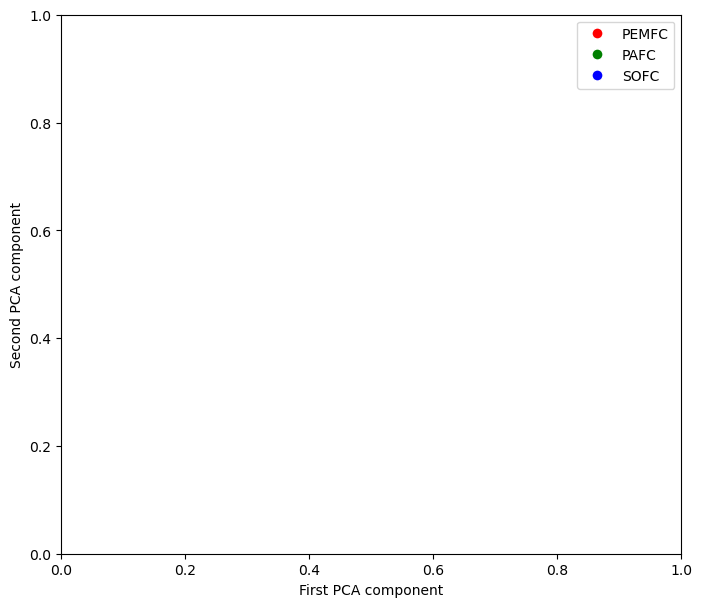

In [24]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.decomposition import PCA
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

def colors(points, words, c):
    indice = []
    c0 = c[0]
    result = [c0 for i in range(len(points))]
    for index, w in enumerate(words):
        indice.append(set())
        for i, p in enumerate(points):
            if p in w:
                indice[index].add(i)
    for index in range(len(indice)):
        for i in range(len(points)):
            if i in indice[index]:
                result[i] = c[index+1]
    return result

# def colors_without_points(words, c):





plt.figure(figsize=(8,7))
plt.style.use('default')

plt.xlabel('First PCA component')
plt.ylabel('Second PCA component')

legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='PEMFC', markerfacecolor='r', markersize=8), 
    Line2D([0], [0], marker='o', color='w', label='PAFC', markerfacecolor='g', markersize=8),
    Line2D([0], [0], marker='o', color='w', label='SOFC', markerfacecolor='b', markersize=8),
    ]

plt.legend(handles=legend_elements, loc='best')
def display_pca_scatterplot(model, words=None, color='r', sample=0, label=False, a=1, edge=False):
    # try:
    if not edge: edge = color
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.vocab.keys()), sample)
        else:
            words = [word for word in model.vocab ]
        
    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    # plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], c=color, edgecolor=edge, alpha=a)
    # except: pass
    if label:
        
        new_texts = [plt.text(x, y, word) for word, (x, y) in zip(words, twodim)]
        adjust_text(new_texts)
        # print(twodim)
        # for word, (x,y) in zip(words, twodim):
        #     # plt.text(x+0.05, y+0.05, word)
        #     plt.text(x-0.5, y+0.2, word)

countries = ['europe', 'china', 'india', 'africa', 'iran', 'australia', 'U.S.', 'EU', 'UK']

popular = ['LiNO3', 'ClK', 'CGO', 'TEGDME', 'ClLi', 'Ce0.8Sm0.2O2-d', 'La0.9Sr0.1Ga0.8Mg0.2O3-d', 'LSCF', 'LiTFSI', 'La0.8Sr0.2Ga0.8Mg0.2O3-d']

electrode = ['o-SWCNH', 'PPy', 'MnO2', 'NCN', 'La4Mn5O15Sr', 'MEAs', 'H2NiO2', 'LCN', 'ERGO', 'BFC', 'EFC', 'URFC', 'NPG', 'Ce9GdO20', 'LSCF', '8YSZ', 'HNiO2', 'WC', 'Ce8O19Sm2']

electrolyte = ['GDE', 'LiTFSI', 'ClK', 'Bi3O6Y', 'LSCF', 'La0.8Sr0.2Ga0.8Mg0.2O3-d', 'tetrafluoroborate', 'LiNO3', 'iodide', 'CGO', 'ClLiO4', 'Na2O4S']

DMFC = ['VRB', 'GDEs', 'GDE', 'PEMs', 'LIB', 'CsF', 'MDC', 'BPM', 'MPD', 'PEMEC', 'AAEM', 'HEV', 'PEC', 'CCM', 'PEMWE', 'TEG', 'UTCL', 'ICE', 'methanol', 'MEC']

PEMFC = ['CsF', 'GDE', 'VRB', 'MDC', 'LIB', 'HEV', 'GDEs', 'TEG', 'PEMs', 'BPM', 'PEMWE', 'ICE', 'CCM', 'PEMEC', 'AAEM', 'PFSA', 'PEC', 'MEC', 'MPD', 'ADT', 'AST']

AFC = ['PEM', 'MDC', 'AAEM', 'micro-CHP', 'CsF', 'LIB', 'HEV', 'TEG', 'ICE', 'IEM', 'ivium', 'VRB', 'MES', 'MEC', 'PEC', 'PVT', 'ISRU', 'PEMWE', 'CPV', 'TPV', 'MEA', 'CsOS', 'NASA', 'A320', 'GDE', 'PV', 'PHEV', 'bacon', 'standalone', 'rSOC', 'CNBN']

PAFC = ['ICE', 'TEG', 'micro-CHP', 'HEV', 'PHEV', 'PVT', 'CPV', 'TPV', 'turbine', 'rSOC', 'standalone', 'BOP', 'CAPEX', 'CDCL', 'BoP', 'micro-turbine', 'm-CHP', 'PEM', 'ICEV', 'IEM', 'BIPV', 'BEV', 'PV', 'MDC', 'CHHP', 'microturbine', 'PV-E', 'DFB', 'hydrogen-fueled']

SOFC = ['YSZ', 'LSCF', 'CGO', 'Ce8O19Sm2', 'PCEC', 'ScSZ', 'BaZr0.1Ce0.7Y0.1Yb0.1O3-d', 'BZCYYb', 'BSCF', 'AFL', 'LNO', 'Ba0.5Sr0.5Co0.8Fe0.2O3-d', 'BaZr0.1Ce0.7Y0.2O3-d', 'MEA', 'La4Mn5O15Sr', 'perovskite', 'La0.6Sr0.4Co0.2Fe0.8O3-d']


color_lst2 = colors(PEMFC+PAFC+SOFC, [PEMFC, PAFC, SOFC], ['lightsteelblue', 'r', 'g', 'b'])

# display_pca_scatterplot(w2v_model.wv, PEMFC + PAFC + SOFC, color=color_lst2, a=0.9, label=True)
# plt.savefig('P5.pdf', bbox_inches='tight')


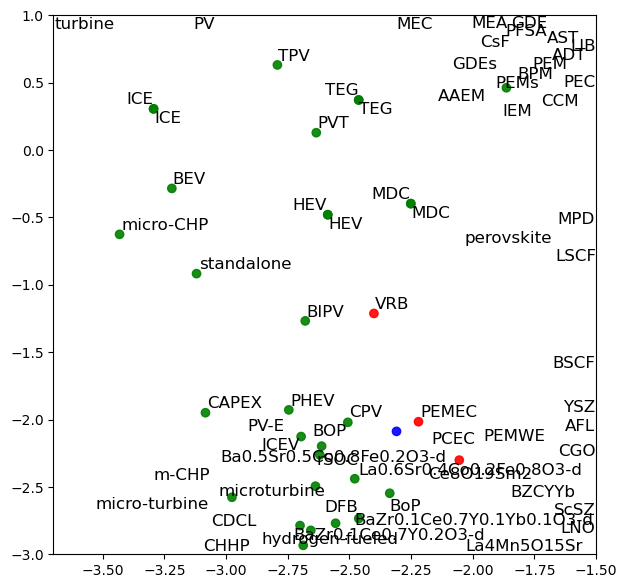

In [21]:
plt.figure(figsize=(7, 7))
plt.xlim(-3.7, -1.5)
plt.ylim(-3, 1)


color_lst2 = colors(PEMFC+PAFC+SOFC, [PEMFC, PAFC, SOFC], ['lightsteelblue', 'r', 'g', 'b'])

display_pca_scatterplot(w2v_model.wv, PEMFC + PAFC + SOFC, color=color_lst2, a=0.9, label=True)

In [ ]:
PAFC = ['ICE', 'TEG', 'micro-CHP', 'HEV', 'PHEV', 'PVT', 'CPV', 'TPV', 'turbine', 'rSOC', 'standalone', 'BOP', 'CAPEX', 'CDCL', 'BoP', 'micro-turbine', 'm-CHP', 'PEM', 'ICEV', 'IEM', 'BIPV', 'BEV', 'PV', 'MDC', 'CHHP', 'microturbine', 'PV-E', 'DFB', 'hydrogen-fueled']
outliers = ['turbine', 'PV', 'PEM']
result = set(PEMFC) - set(outliers)
print(result)



plt.figure(figsize=(10, 10))
plt.xlim(-4, 4)
plt.ylim(-3, 3)
display_pca_scatterplot(w2v_model.wv, result, color='r', a=0.9, label=True)

In [ ]:
print(color_lst.index('r'))

In [ ]:
type(w2v_model.wv.index_to_key)
# print(list(all_tokens_punct)[6])
print()